In [48]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

pd.set_option('display.max_columns', None)

In [49]:
# Store filepath in a variable
file = Path("nutrition.csv", encoding='UTF-8')
file_df = pd.read_csv(file)
file_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,30.6,30.6,NaN,NaN,29.4,31.8,31255.0,NaN,NaN,NaN,NaN,NaN,Hispanic,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,29.3,29.3,NaN,NaN,25.7,33.3,842.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,28.8,28.8,NaN,NaN,28.1,29.5,62562.0,NaN,NaN,NaN,NaN,"$50,000 - $74,999",NaN,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.7,32.7,NaN,NaN,31.9,33.5,60069.0,NaN,NaN,NaN,NaN,Data not reported,NaN,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,26.6,26.6,NaN,NaN,25.6,27.6,30904.0,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [50]:
len(file_df)


88629

In [51]:
droppedna = file_df.dropna(subset = "Data_Value")
clean_df = droppedna.loc[droppedna["StratificationCategory1"] == "Income"]
clean_df = clean_df.loc[clean_df["Stratification1"] != "Data not reported"]
clean_df = clean_df.loc[clean_df["LocationDesc"] == "National"]
clean_df = clean_df.loc[(clean_df["Question"]=="Percent of adults aged 18 years and older who have obesity") | (clean_df["Question"]=="Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)")]


In [52]:
clean_df["Count"] = round((clean_df["Data_Value"]/100)*clean_df["Sample_Size"],0)

In [53]:
len(clean_df)

96

In [54]:
clean_df.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Count
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,28.8,28.8,NaN,NaN,28.1,29.5,62562.0,NaN,NaN,NaN,NaN,"$50,000 - $74,999",NaN,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075,18018.0
30,2014,2014,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.2,32.2,NaN,NaN,31.5,33.0,62892.0,NaN,NaN,NaN,NaN,"$15,000 - $24,999",NaN,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$15,000 - $24,999",INC,INC1525,20251.0
68,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.3,32.3,NaN,NaN,31.4,33.2,49598.0,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,NaN,OWS,OWS1,Q036,VALUE,59,Income,"Less than $15,000",INC,INCLESS15,16020.0


In [55]:
reduced_df = clean_df[["Question","Stratification1","Count","Sample_Size"]]
reduced_df = reduced_df.rename(columns={"Stratification1": "Income", "Count": "Answered Yes", "Sample_Size": "Total"})
reduced_df.head(3)

,Question,Income,Answered Yes,Total
2,Percent of adults aged 18 years and older who ...,"$50,000 - $74,999",18018.0,62562.0
30,Percent of adults aged 18 years and older who ...,"$15,000 - $24,999",20251.0,62892.0
68,Percent of adults aged 18 years and older who ...,"Less than $15,000",16020.0,49598.0


In [56]:

final_df = reduced_df.groupby(["Question", "Income"]).sum()
final_df["Percent"]=final_df["Answered Yes"]/final_df["Total"]

final_df

Answered Yes  \
Question                                           Income                             
Percent of adults aged 18 years and older who h... $15,000 - $24,999       210922.0   
                                                   $25,000 - $34,999       138693.0   
                                                   $35,000 - $49,999       176497.0   
                                                   $50,000 - $74,999       195847.0   
                                                   $75,000 or greater      305053.0   
                                                   Less than $15,000       134528.0   
Percent of adults who achieve at least 150 minu... $15,000 - $24,999       126489.0   
                                                   $25,000 - $34,999        90077.0   
                                                   $35,000 - $49,999       127962.0   
                                                   $50,000 - $74,999       150679.0   
                                                   $75,000 or greater      324231.0   
                                                   Less than $15,000        74540.0   

                                                                           Total  \
Question                                           Income                          
Percent of adults aged 18 years and older who h... $15,000 - $24,999    627544.0   
                                                   $25,000 - $34,999    431963.0   
                                                   $35,000 - $49,999    560844.0   
                                                   $50,000 - $74,999    631554.0   
                                                   $75,000 or greater  1176781.0   
                                                   Less than $15,000    385818.0   
Percent of adults who achieve at least 150 minu... $15,000 - $24,999    289188.0   
                                                   $25,000 - $34,999    191658.0   
                                                   $35,000 - $49,999    252861.0   
                                                   $50,000 - $74,999    281011.0   
                                                   $75,000 or greater   543512.0   
                                                   Less than $15,000    180278.0   

                                                                        Percent  
Question                                           Income                        
Percent of adults aged 18 years and older who h... $15,000 - $24,999   0.336107  
                                                   $25,000 - $34,999   0.321076  
                                                   $35,000 - $49,999   0.314699  
                                                   $50,000 - $74,999   0.310103  
                                                   $75,000 or greater  0.259227  
                                                   Less than $15,000   0.348683  
Percent of adults who achieve at least 150 minu... $15,000 - $24,999   0.437394  
                                                   $25,000 - $34,999   0.469988  
                                                   $35,000 - $49,999   0.506057  
                                                   $50,000 - $74,999   0.536203  
                                                   $75,000 or greater  0.596548  
                                                   Less than $15,000   0.413473

In [57]:
income_list = reduced_df["Income"].unique()
print(income_list)

['$50,000 - $74,999' '$15,000 - $24,999' 'Less than $15,000'
 '$35,000 - $49,999' '$75,000 or greater' '$25,000 - $34,999']


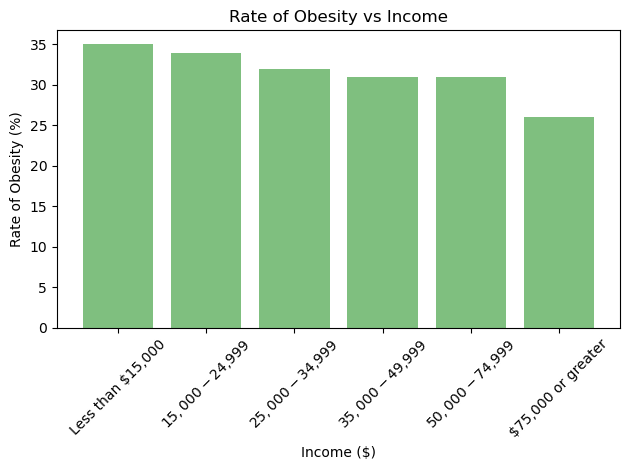

In [58]:
x_axis_ob = np.arange(len(income_list))
tick_locations = [value for value in x_axis_ob]

x_labels = [income_list[2], 
             income_list[1], 
             income_list[5], 
             income_list[3], 
             income_list[0], 
             income_list[4]]

y_axis_ob = [int(round((final_df.iloc[5][2]*100),0)), 
             int(round((final_df.iloc[0][2]*100),0)), 
             int(round((final_df.iloc[1][2]*100),0)), 
             int(round((final_df.iloc[2][2]*100),0)), 
             int(round((final_df.iloc[3][2]*100),0)), 
             int(round((final_df.iloc[4][2]*100),0))]

plt.bar(x_axis_ob, y_axis_ob, color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, x_labels, rotation=45)
plt.xlabel("Income ($)")
plt.ylabel("Rate of Obesity (%)")
plt.title("Rate of Obesity vs Income")

plt.tight_layout()
plt.savefig("Inc.png", dpi=200)



In [66]:
(slope, intercept, rvalue, pvalue, stderr) = linregress([10000,20000,30000,42500,62500,85000], [y_axis_ob])
rvalue

-0.9533612594627199

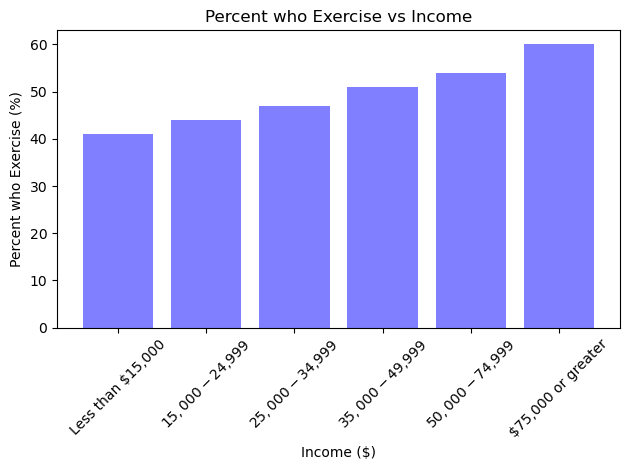

In [47]:
x_axis_ex = np.arange(len(income_list))
tick_locations = [value for value in x_axis_ob]

x_labels = [income_list[2], 
             income_list[1], 
             income_list[5], 
             income_list[3], 
             income_list[0], 
             income_list[4]]

y_axis_ex = [int(round((final_df.iloc[11][2]*100),0)), 
             int(round((final_df.iloc[6][2]*100),0)), 
             int(round((final_df.iloc[7][2]*100),0)), 
             int(round((final_df.iloc[8][2]*100),0)), 
             int(round((final_df.iloc[9][2]*100),0)), 
             int(round((final_df.iloc[10][2]*100),0))]

plt.bar(x_axis_ex, y_axis_ex, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, x_labels, rotation=45)
plt.xlabel("Income ($)")
plt.ylabel("Percent who Exercise (%)")
plt.title("Percent who Exercise vs Income")

plt.tight_layout()
plt.savefig("Ex.png", dpi=200)

In [67]:
(slope, intercept, rvalue, pvalue, stderr) = linregress([10000,20000,30000,42500,62500,85000], [y_axis_ex])
rvalue

0.9942674349621383